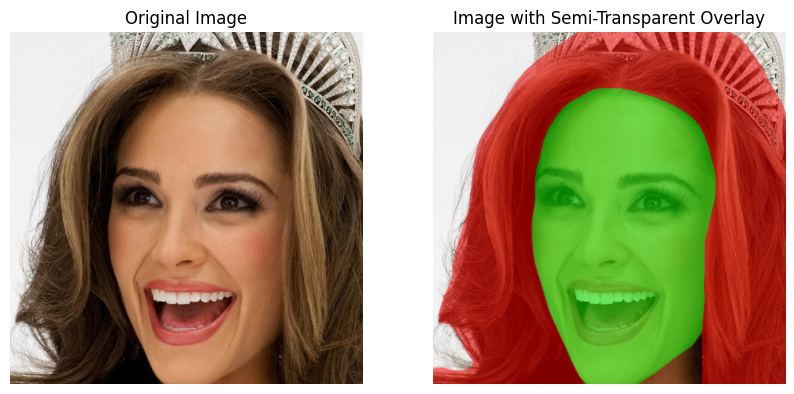

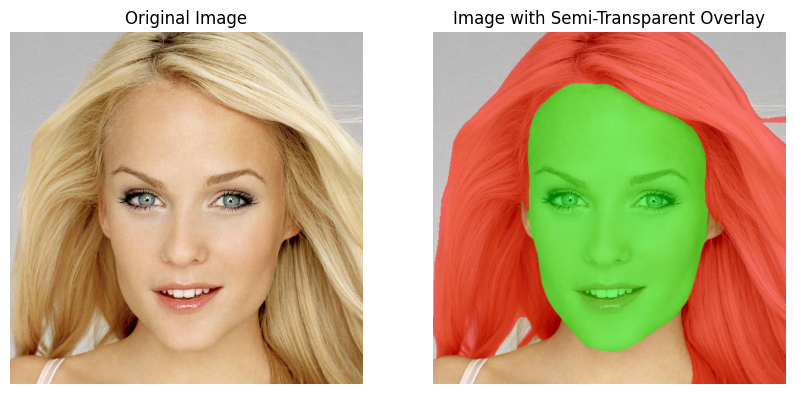

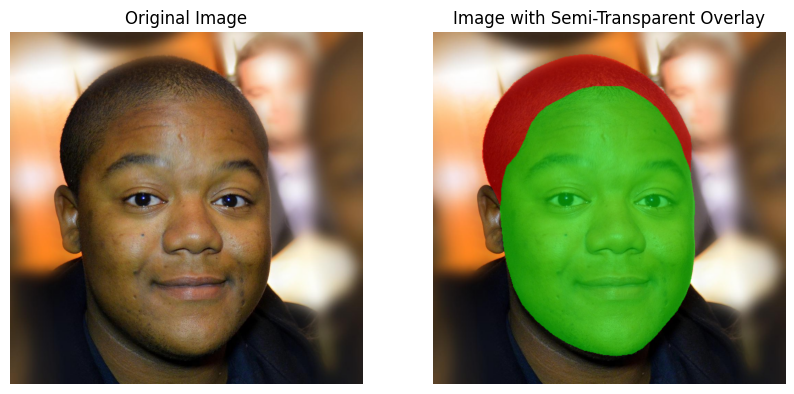

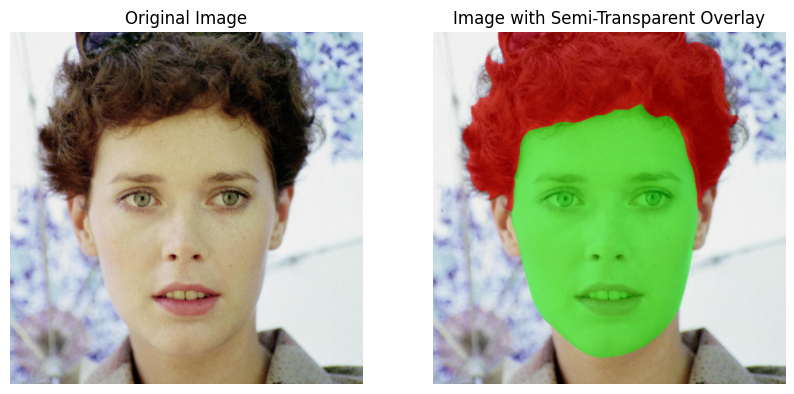

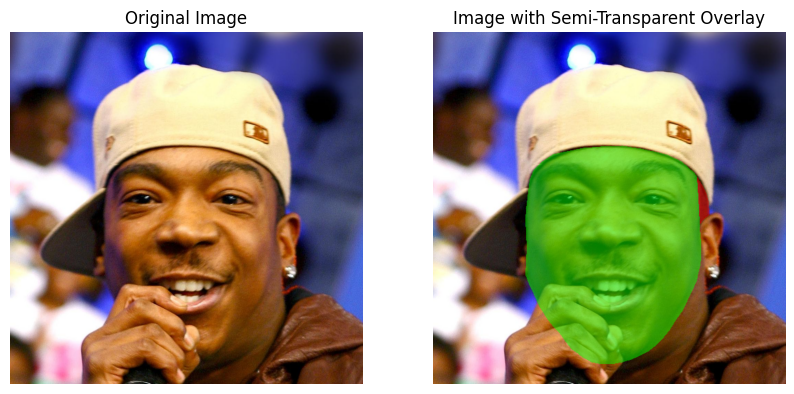

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append("../src")  # add src folder to Python path

from dataset import HairSegDataset, get_default_transforms

def visualize_sample_transparent(dataset, idx=0, alpha=0.5):
    """
    Visualizes an image with semi-transparent hair and skin overlays.
    alpha: float between 0 and 1 for transparency
    """
    image, mask = dataset[idx]

    # Convert tensor to numpy if needed
    if hasattr(image, 'permute'):  # torch tensor
        image = image.permute(1,2,0).numpy()

    overlay = image.copy()

    # Hair = Red
    hair_mask = mask == 2
    overlay[hair_mask] = (1 - alpha) * overlay[hair_mask] + alpha * np.array([255, 0, 0])

    # Skin = Green
    skin_mask = mask == 1
    overlay[skin_mask] = (1 - alpha) * overlay[skin_mask] + alpha * np.array([0, 255, 0])

    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.title("Original Image")
    plt.imshow(image.astype(np.uint8))
    plt.axis('off')

    plt.subplot(1,2,2)
    plt.title("Image with Semi-Transparent Overlay")
    plt.imshow(overlay.astype(np.uint8))
    plt.axis('off')
    plt.show()


# Load the dataset
dataset = HairSegDataset("../data/images", "../data/masks", transform=get_default_transforms())

# Visualize first 5 samples
for i in range(5):
    visualize_sample_transparent(dataset, i, alpha=0.5)
